# Math for ML: Probability

In Part 4 of the series on Math for ML we'll cover the basic theory of probability. Probability is the study of randomness. Some of the main topics we'll cover in this lesson are,
- random variables and random number generators,
- discrete probability distributions,
- continuous probability distributions,
- multivariate distributions,
- moments of a distribution,
- conditional distributions.

Let's get started.

First, a word about the line `np.random.seed(0)` in the following cell. For reasons I'll explain below, random numbers depend on a choice of **seed** to tell the function in what order to sample them. One major implication of this fact is that if you want to make sure your code always runs the same output when using random functions like this, you need to make sure to specify what seed you're using in advance. If you don't, each time you run the notebook you're liable to get slightly different outputs. 

Since I want to make sure my code is reproducible, I will from now on always set a seed. To set a seed in numpy, you just need to pass in `np.random.seed(seed)` right after import numpy, where `seed` can be any positive integer you like. Different seeds will produce random numbers in different orders.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

plt.rcParams["figure.figsize"] = (4, 3)
np.random.seed(0)

## Random Variables

Probability is a calculus for modeling random quantities, a way of taking into account the fact that real world data is usually noisy. For practical purposes, you can think of randomness as a way to try to quantify what you don't know about something because you don't have perfect information about that thing. If you had perfect information there would be no randomness. If you had *no* information at all it would be completely random. Randomness is this a measure of ignorance or uncertainty.

In the world of probability, a random quantity is often called a **random variable**. Random variables can come in the form of numbers, arrays, functions, whatever we like. If $x$ is an *ordinary* variable it will take on a definite value. If we "sample" $x=1$, we're guaranteed to get $x=1$ every single time. If we pass $x$ into a function we will get a *definite* output $y=f(x)$ every single time. But if $x$ is a *random* variable and we sample it, we don't know what we'll get out. If we ask for $x=1$ we might get $x=1.2$ or $x=-100$ or some other value. If we pass $x$ into a function we don't *know* what $f(x)$ will give either. Since we can't predict what $x$ will be with any certainty, we can't predict what $y=f(x)$ will be either.

We can see an example of how this randomness works by using a **random number generator**. These are functions that generate (pseudo) random numbers. The most basic random number generator is usually just called **rand**, and generates random floating point numbers between 0 and 1 uniformly, i.e. with each number having an equal chance of being chosen. The rand function in numpy is called `np.random.rand`. Below I'll use it to sample a few random numbers.

In [2]:
for i in range(10):
    x = np.random.rand()
    print(x)

0.5488135039273248
0.7151893663724195
0.6027633760716439
0.5448831829968969
0.4236547993389047
0.6458941130666561
0.4375872112626925
0.8917730007820798
0.9636627605010293
0.3834415188257777


By design, all of these values ended up being between 0 and 1. But what do they *look like*? Are values around 0.5 more common than values around 0 or 1? Are all values equally likely to be sampled? The easiest way to visualize what a random number generator is outputting is using a **histogram**. A histogram is a bar chart of the number of times each number is sampled. The x-axis shows all numbers that got sampled and the y-axis shows the number of counts for each. In matplotlib we can plot histograms of an array `x` with the function `plt.hist(x)`.

I'll sample 100 values now with rand, put them into a list `x`, and plot their histogram below. Rather than loop over the random numbers and put them into a list I'll use the more efficient `x = np.random.rand(100)` command to generate an array of 100 random numbers all at once.

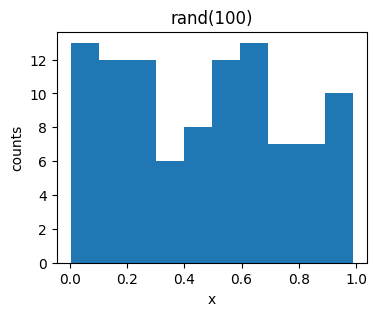

In [3]:
n = 100
x = np.random.rand(n)
plt.hist(x)
plt.xlabel('x')
plt.ylabel('counts')
plt.title(f'rand({n})')
plt.show()

It's still kind of hard to see what's going on. Let's now sample 10,000 numbers instead and plot their histogram.

Note since I'll be using histograms a lot in this lesson I'm going to write a helper function `plot_histogram` to bundle up the code to plot them nicely.

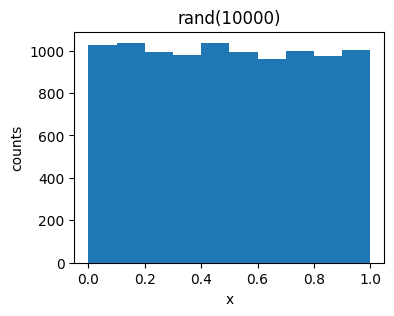

In [4]:
def plot_histogram(x, title='', show_xticks=False, **kwargs):
    plt.hist(x, **kwargs)
    plt.xlabel('x')
    plt.ylabel('counts')
    plt.title(title)
    plt.show()
    
n = 10000
x = np.random.rand(n)
plot_histogram(x, title=f'rand({n})')

It should be increasingly clear now that what's going on is that rand is sampling numbers between 0 and 1 with equal chance. Why? Each *bin* in the histogram is about as high as the other bins, indicating that each is getting sampled about the same amount. This type of "flat" sampling is called **uniform sampling**.

You may be questioning that it's indeed the case that each bin is truly getting sampled as much as the other bins. After all, the plot still clearly shows their heights vary a bit. This is really due to the fact that we're only sampling a finite amount of numbers. To *really* verify that the sampling is uniform we should sample an *infinite* number of times. But of course we can't. Feel free to sample more and more values and plot their histograms. You should see the histogram get flatter and flatter as you increase the sample size.

## Discrete Probability

### Motivation

While I've said that probability is the study of random variables, I've still yet to define what exactly a probability is. What does it mean to say that the probability of some event occurring is 50%? To understand what phrases like this mean better let's start with a very simple example, the die (singular of dice).

If you've never seen dice before, they're white cubes with black dots on each face of the cube. Each face gets some number of black dots on it between 1 and 6. People like to "roll" these dice in games, usually by shaking and tossing them onto the ground. The person with the highest score, i.e. the sum of the number of dots facing upward, wins that round.

<br><center><span style="font-size: 80px;">&#127922;</span></center><br>

Let's think a little bit about a single die. Suppose I just want to throw a single die. Having not thrown the die yet, what should I "expect" my score to be? Since it's a single die, the possible scores I can have are just the number of dots on each faces of the die, i.e. $x=1,2,3,4,5,6$. But this alone doesn't tell me what the chance is that any given $x$ turns up in a roll. We need some other information.

Perhaps your common sense kicks in and you think, "Well clearly each number has an equal chance of showing up if you roll the die". In practice you'd usually be right. This is called the **equiprobability assumption**. You're saying that, since I don't have any other information to go on, each number should have an equal chance of showing up on each roll. That is, on any given roll, each number should show up with 1:5 odds. Or said yet again in a completely equivalent but more useful way, on any given roll each number $x_k$ should have a $$p_k=\text{probability of rolling } x_k = \frac{1}{6}$$ chance (or **probability**) of facing upward. Notice two important facts:
1. Each probability $p_k \geq 0$,
2. The sum of all probabilities is one, $p_1 + \cdots + p_6 = 1$.

The most important hallmark of science is that it's important to verify whether your assumptions are correct by looking at real data. Let's try to do that. We'll "verify" that each roll has equal probability by running a **simulation**. A simulation is essentially a python function designed to mimic some kind of real world process, in this case the rolling of a fair die.

What I'm going to do is pretend I've rolled a fair die a certain number of times, call it `n_trials`. Each time I roll I'll get some random integer $x=1,2,3,4,5,6$. To generate these random integers I'll use the function `np.random.randint(low, high+1, size=n_trials)`, which samples `n_trials` integers in the range `low, ..., high`. More on how this function works in a second.

In [5]:
def simulate_fair_die_roll(n_trials):
    return np.random.randint(1, 7, size=n_trials)

n_trials = 1000
x = simulate_fair_die_roll(n_trials)
x.shape, x[:10]

((1000,), array([6, 2, 2, 2, 5, 5, 4, 4, 3, 4]))

Sampling for 1000 trials, we get an array `x` of 1000 "die rolls". If the die rolls were indeed uniform, we'd expect $p_i=1/6$ for each $x_i$, which for 1000 trials would mean each number $x_i$ should be sampled about $1/6 \cdot 1000 \approx 167$ times.

I'll now plot their histogram to see what we get. Indeed, we see more or less uniform height bins between about 150 and 175. Try increasing `n_trials` to confirm that indeed the more trials you take, the flatter the histogram gets.

**Note:** I plotted the histogram slightly different here than above. I used a different plotting function called `plt.bar` and plotted the unique `x` values vs their counts, wrapping everything in a function `plot_histogram_discrete`. I did it this way because `plt.hist` doesn't plot bins of discrete samples very nicely.

In [6]:
def plot_histogram_discrete(x, title='', show_xticks=True, **kwargs):
    x_unique, counts = np.unique(x, return_counts=True)
    plt.bar(np.arange(len(x_unique)), counts, **kwargs)
    if show_xticks:
        plt.xticks(np.arange(len(x_unique)), x_unique)
    plt.xlabel('x')
    plt.ylabel('counts')
    plt.title(title)
    plt.show()

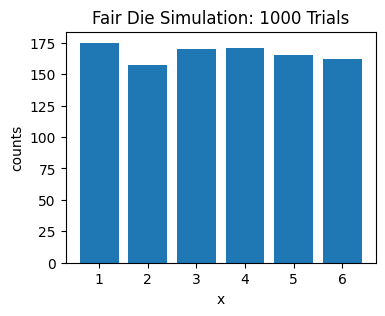

In [7]:
plot_histogram_discrete(x, title=f'Fair Die Simulation: {n_trials} Trials')

**Aside:** If you're curious, we can actually implement every distribution we'll see in this lesson using rand alone, including of course the `randint` function. The trick in this case is to sample from `np.random.rand`, scale the outputs so they fall between `low` and `high`, then round each value down to the nearest integer using `np.floor`. This will give a uniform set of integers in the range `low, ..., high`. Here's an example.

In [8]:
def randint(low=0, high=2, size=1):
    x = np.random.rand(size)
    x = (high - low) * x + low
    x = np.floor(x).astype(int)
    return x

x = randint(0, 7, size=10); x

array([4, 6, 1, 1, 5, 5, 2, 0, 3, 3])

Back to our die problem. What if your common sense was incorrect? What if you rolled the die a bunch of times and found out some numbers occurred a lot more often than others? This would happen if the die were weighted unevenly, or *loaded*. In this case we're left to assign some *weight* $w_k$ to each number $x_k$. These weights can be any positive number we like, or even zero.

To determine what the right weights should be empirically, probably the easiest way would again be to roll the die a bunch of times and count how much each $x_k$ occurs. Those counts will be your weights, call them $n_k$. Then divide by the total number of rolls $N$ to get the probabilities. The probabilities would then be

$$\text{Prob}(x=x_k) = p_k \approx \frac{n_k}{N},$$

with the approximate equality becoming exact as $N$ becomes infinitely large. That is, the more times you roll the die, i.e. the higher you let $N$ go, the more accurate your estimate for the probabilities will be. In the infinite limit the answer will be exact. This important fact is called the **Law of Large Numbers**.

**Aside:** The interpretation of probabilities as $p_k =\frac{n_k}{N}$ as $N$ gets infinitely large is strictly speaking only one way to interpret what a probability means. This "experimental" interpretation of probability is often called the **frequentist** interpretation. The frequentist interpretation contrasts with probability interpreted as a *degree of belief* about whether something will occur, which is the **Bayesian** interpretation. Rather than get all rigidly philosophical, I'll adopt a pragmatic point of view in this book and go back and forth between the frequentist and Bayesian interpretations at will depending on the situation.

To test if your die is loaded, what you can do is just this. Roll the die for $N$ trials and calculate the probabilities. If they're all roughly equal to $1/6$ then the die is fair. Otherwise it's loaded. Let's again look at an example by running another simulation.

I'm going to run a new simulation called `simulate_loaded_die_roll` that takes in not just the number of trials, but also a list of weights for each value of the die. Instead of `np.random.randint` I'm going to use a similar function called `np.random.choice`, which lets you sample from any array of values in a weighted fashion by passing in a list `p` of the *normalized* weights `weights / sum(weights)`.

Let's suppose for the sake of argument that we roll the die a bunch of times and observe that the end values $x=1, 6$ roll half as often as the middle values $x=2,3,4,5$. Then we have

$$N=1+2+2+2+2+1=10,$$
$$p_1 = p_6 = \frac{1}{10} = 0.1,$$
$$p_2 = p_3 = p_4 = p_5 = \frac{2}{10} = 0.2.$$

We should thus see a histogram where the counts for the ends are around 100, and in the middle around 200.

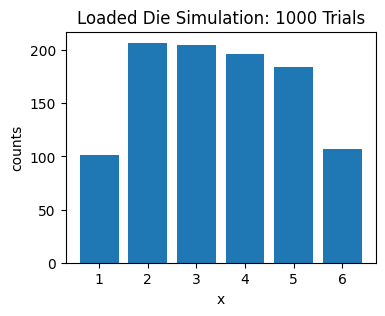

In [9]:
def simulate_loaded_die_roll(n_trials, weights):
    values = np.arange(1, 7)
    return np.random.choice(values, size=n_trials, p=weights / np.sum(weights))

n_trials = 1000
weights = [1, 2, 2, 2, 2, 1]
x = simulate_loaded_die_roll(n_trials, weights)
plot_histogram_discrete(x, title=f'Loaded Die Simulation: {n_trials} Trials')

**Aside:** Just as we could implement randint from rand, we can also implement choice from randint, at least in the simple case of equal-weighted sampling. Basically all we need to do is pass in the array we want to sample from and use randint on its *indexes*. Once we've sampled the indexes randomly we can just pass them into the array to sample the values themselves. Allowing for weighted sampling is actually a bit trickier. We'll come back to that.

In [10]:
def choice(x, size=1):
    idxs = randint(low=0, high=len(x), size=size)
    return x[idxs]

cats = np.array(['a', 'b', 'c'])
x = choice(cats, size=10); x

array(['a', 'c', 'c', 'b', 'c', 'a', 'c', 'a', 'a', 'a'], dtype='<U1')

### Definitions

The way we defined probability above is more general than you'd expect. Suppose we perform some experiment for $N$ trials and observe one of $K$ values $x_0,x_1,\cdots,x_{K-1}$. Each $x_k$ value is observed to occur $n_k$ times. Then the probability of observing the k<sup>th</sup> $x_k$ is just

$$p_k \approx \frac{n_k}{N}.$$

By the Law of Large Numbers this equality becomes exact as $N$ gets infinitely large. Notice this relationship defines a function $p_k = p(x_k)$ mapping each value to its probability. This function $p(x)$ is called the **probability function**, or sometimes the probability mass function (PMF). 

Another more common name for the relationship $p_k = p(x_k)$ is **probability distribution**. We'd say $p(x)$ is the probability distribution for the random variable $x$. Each possible function $p(x)$ defines its own probability distribution on $x$.

The values $x_0,x_1,\cdots,x_{k-1}$ that the probability function is allowed to take on are called the **support** of the probability distribution. The support is all values $x$ in which $p(x)$ is allowed to be greater than 0.

The probability function satisfies a couple of defining properties. It's always positive, and it sums to one over all values,

$$p(x) \geq 0, \\ \sum_{k=0}^{K-1} p(x_k) = p(x_0) + p(x_1) + \cdots + p(x_{k-1}) = 1.$$

In this sense, *any* positive function that sums to one over all its values is a valid probability function on the set of values $x_0,x_1,\cdots,x_{k-1}$. These two facts can actually be used to define a *general* notion of probability as a positive function on random variables that sums to one.

In fact, *any* positive "weighting" function $w(x) \geq 0$ can be made into a probability function by dividing by its sum over all values,

$$p(x_k) = \frac{w(x_k)}{\sum_{k=0}^{K-1} w(x_k)} = \frac{w(x_k)}{w(x_0) + w(x_1) + \cdots w(x_{k-1})}.$$

This trick is used extensively in machine learning to create probabilities out of other functions. One notable example is the softmax function, which does exactly this normalization with the exponential function $w(x)=e^x$.

Here's what the probabilities might look like for an exponential weighting function like this over the integers $x=-4, -3, \cdots, 3$. This probability function seems to assign the most weight to the largest values. Of course it will be, since the largest exponential will always be on the largest value.

In [11]:
x = np.arange(-4, 4, 1)
w = lambda x: np.exp(x)
p = lambda x: w(x) / np.sum(w(x))
p(x)

array([5.76612770e-04, 1.56739601e-03, 4.26062410e-03, 1.15815771e-02,
       3.14819905e-02, 8.55769227e-02, 2.32622194e-01, 6.32332683e-01])

We'd like to think as being able to **sample** values from a probability distribution, i.e. to use $p(x)$ to spit out a likely value $x$. Sampling is what creates histograms. We sample $N$ points from $p(x)$ and plot them. A shorthand notation for sampling $x$ from the distribution $p(x)$ is to write $x \sim p(x)$, read as $\text{"$x$ is distributed as $p(x)$"}$.

### Common Discrete Distributions

Some discrete probability distributions occur so frequently that they get a special name. Here are a few.

**Discrete uniform distribution:** $DU(a,b)$

Let $a,b$ be two integer parameters with $a<b$. The discrete uniform distribution is defined on the values $x=a,a+1,\cdots,b-1$. It's often denoted abstractly with the symbol $DU(a,b)$, and is defined by the probability function

$$
p(x) = \begin{cases}
\frac{1}{b-a} & \text{for all } x = a, a+1, \cdots, b-1, \\
0 & \text{otherwise}.
\end{cases}
$$

This is the equal weighting distribution we saw with the fair die. In that case, $a=1, b=6+1=7$, so $p(x)=\frac{1}{6}$.

**Note:** The histogram of a distribution gotten from sampling from it $N$ times is an approximate representation of the true probability function $p(x)$. It becomes exact in the limit $N$ gets infinitely large. Nevertheless, it provides a good indicator for what a distribution "looks like", even for less-than-infinite data.

As we already saw, its histogram will look flat on its support values and fall to zero everywhere else. To sample discrete uniform random variables in python we can just use `np.random.randint(a, b)`.

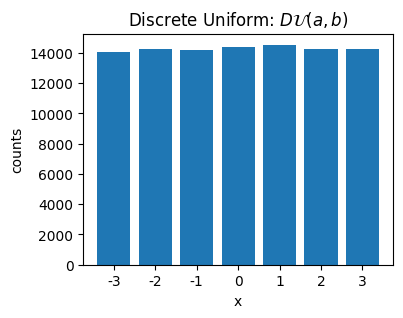

In [12]:
a = -3
b = 4
x = np.random.randint(a, b, size=100000)
plot_histogram_discrete(x, 'Discrete Uniform: $D\mathcal{U}(a,b)$')

**Bernoulli distribution:** $\text{Ber}(p_0)$

The Bernoulli distribution, denoted $\text{Ber}(p_0)$, is a distribution on the binary values $x=0,1$. It's defined by a single parameter $0 \leq p_0 \leq 1$. $x=0,1$. Its probability function is given by
$$
p(x) = p_0^x (1-p_0)^{1-x} = 
\begin{cases}
1-p_0 & x = 0, \\
p_0 & x = 1, \\
0 & \text{otherwise}.
\end{cases}
$$

From this function we can see that $p_0$ is just the probability of getting $x=1$. The Bernoulli distribution is used to model binary outcomes like coin flips. You can think of $p_0$ as the probability of getting heads ($x=1$) and $1-p_0$ as the probability of getting tails ($x=0$).

An important fact is that *any* binary random variable $x=0,1$ must be Bernoulli distributed for some $p_0$.

The Bernoulli distribution shows up in machine learning when dealing with binary classification problems, which map arrays of data $\mathbf{X}$ to binary outputs $y=0,1$. In this setting $p(y|\mathbf{X})$ would be a binomial distribution with some $p_0(\mathbf{X})$ that has to be learned.

To sample Bernoulli random variables in python we can use `np.random.choice([0, 1], p=[1 - p0, p0])`. In this case, the histogram will be two bars with the highest occurring at `max(p0, 1 - p0)`.

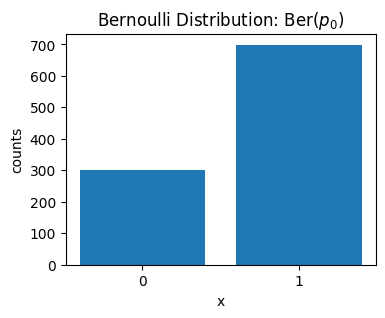

In [13]:
p0 = 0.7
x = np.random.choice([0, 1], p=[1 - p0, p0], size=1000)
plot_histogram_discrete(x, 'Bernoulli Distribution: Ber$(p_0)$')

**Aside:** We can also build a simple function from scratch so sample from a Bernoulli distribution. The idea is to sample from rand, which will generate continuous values between 0 and 1 uniformly. If that number is larger than $p_0$, generate $x=1$. Else, generate $x=0$.

In [14]:
def bernoulli(p=0.5, size=1, seed=0):
    x = np.random.rand(size)
    return (x <= p).astype(int)

x = bernoulli(size=10); x

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0])

**Categorical distribution:** $\text{Cat}(p_0,\cdots,p_{K-1})$

The categorical distribution, denoted $\text{Cat}(p_0,\cdots,p_{K-1})$, is a distribution on $K$ unrelated *categories* of values $x_0,x_1,\cdots,x_{K-1}$. It takes $K$ parameters $p_0,p_1,\cdots,p_{K-1}$, where each $0 \leq p_k \leq 1$. Its support is the set of $K$ integers $x=0,1,\cdots,K-1$. The probability function is given by
$$
p(x) = \begin{cases}
p_0 & x = 0, \\
p_1 & x = 1, \\
\cdots & \\
p_{K-1} & x = K-1, \\
0 & \text{otherwise}.
\end{cases}
$$

Note that to be a valid probability function it must be the case that $p_0+p_1+\cdots+p_{K-1}=1$.

Each $x_k$ can be thought of as some specific category out of a set of $K$ classes. An example of this distribution might be picking out shirts from a box, where each shirt can be one of three different colors red, blue, green. You could think of each colored shirt $k$ as having some probability $p_k$ of being picked.

Another way to write this distribution is to treat $p_0,\cdots,p_{K-1}$ as a size $K$ *probability vector* $\mathbf{p}$. Then we could just write $\text{Cat}(\mathbf{p})$ to be extra lazy.

An important fact is that *any* random variable $x=0,1,\cdots,K-1$ representing a discrete set of $K$ classes must be  categorically distributed for some choices of probabilities $p_0,p_1,\cdots,p_{K-1}$.

The categorical distribution shows up in machine learning when doing multi-class classification, where we seek to map input data $\mathbf{X}$ to one of $K$ classes $y=0,\cdots,K-1$. The $K$ parameters $p_k(\mathbf{X})$ would again need to be learned from the data.

The histogram for the categorical distribution will look like $K$ bars each of relative height $p_k$. To sample from a categorical distribution in python, use `np.random.choice(np.arange(k), p=p)`, where `p` is the probability vector $\mathbf{p}$.

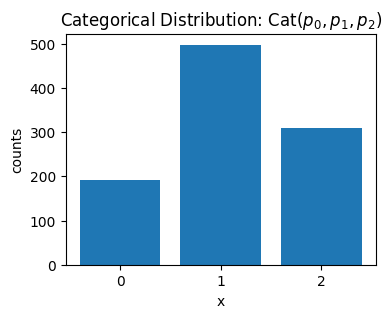

In [15]:
p = [0.2, 0.5, 0.3]
x = np.random.choice(np.arange(len(p)), p=p, size=1000)
plot_histogram_discrete(x, 'Categorical Distribution: Cat$(p_0,p_1,p_2)$')

**Aside:** Here's a function that implements the sampler for a categorical distribution from scratch. It's a little more complicated than the others we've seen so far. What it's basically doing is, 
- for each value $x$ it wants to sample,
- use rand to generate a uniform random number $u$ between 0 and 1,
- loop over the probability vector $\mathbf{p}$, summing up the probabilities until they're greater than the random number $r$ just sampled,
- add $x$ to the array $\mathbf{x}$ and stop looping over $\mathbf{p}$.

In [16]:
def categorical(p, size=1):
    assert np.allclose(sum(p), 1.0), 'probs must sum to one'
    x = np.zeros(size).astype(int)
    for i in range(size):
        u = np.random.rand()
        cumsum = 0
        for k, pk in enumerate(p):
            cumsum += pk
            if cumsum > u:
                x[i] = k
                break
    return x

x = categorical(p=[0.2, 0.5, 0.3], size=10); x

array([1, 1, 0, 1, 2, 2, 1, 1, 2, 2])

## Continuous Probability

### Motivation

Discrete probabilities addressed a specific kind of situation, where we had $n$ discrete possible outcomes and wanted to know what the probability was of each one turning up. In machine learning this kind of situation often shows up in classification problems. 

A different type of situation where probabilities come up is in measurement noise. Suppose you're out taking measurements or something. Maybe you're measuring the length of a piece of pipe or something like that. Remembering the old saying, "measure twice, cut once", you decide to be very careful. You bring in 10 people and have each one separately measure the piece of pipe using a somewhat faulty caliper you have that can measure down to 1/100 of an inch. You then compile their 10 measurements into a table like this,

| Person | Measurement |
|--------|-------------|
| John   | 10.10       |
| Mary   | 10.10       |
| Steve  | 10.09       |
| Sarah  | 10.05       |
| Michael| 10.08       |
| Emily  | 10.14       |
| David  | 10.09       |
| Karen  | 10.13       |
| Tom    | 10.11       |
| Jessica| 10.14       |

What should you conclude from this table? You're looking for a single measurement value to use to cut the pipe. What should you do? Your instinct might suggest to take the average of these values, which turns out to be 10.1.

In [17]:
x = [10.10, 10.10, 10.09, 10.05, 10.08, 10.14, 10.09, 10.13, 10.11, 10.14]
mean = np.mean(x).round(2)
mean

10.1

But now you start to wonder why the measurements for each person are so far off. You decide to split the measurements into a new table by adding a new column `Error` that looks at the difference of each measured value from the average you just calculated.

| Person | Measurement | Error |
|--------|-------------|-------|
| John   | 10.10       | 0.00  |
| Mary   | 10.10       | 0.00  |
| Steve  | 10.09       | -0.01 |
| Sarah  | 10.05       | -0.05 |
| Michael| 10.08       | -0.02 |
| Emily  | 10.14       | 0.04  |
| David  | 10.09       | -0.01 |
| Karen  | 10.13       | 0.03  |
| Tom    | 10.11       | 0.01  |
| Jessica| 10.14       | 0.04  |

It seems kind of like the errors might be random, so you look at their histogram and see if they have any kind of pattern. It seems like most results are pretty close to your average of 0.1, but there are a few on either side that are a little further away.

In [18]:
error = x - mean
error.round(2).tolist()

[0.0, 0.0, -0.01, -0.05, -0.02, 0.04, -0.01, 0.03, 0.01, 0.04]

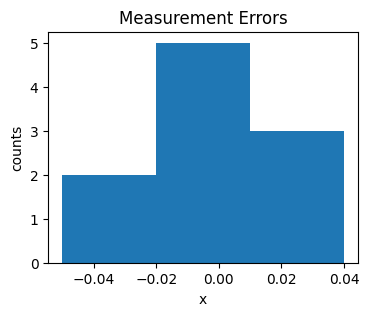

In [19]:
plot_histogram(error, title='Measurement Errors', bins=3)

Let's try to model what's going on here. Suppose $x$ is the true value we're trying to measure, a random variable that can take on any real value. Let $x_0$ denote the true value of the measurement. This is what we would measure if we could do so with zero error. Denote the error term by $\varepsilon$. Then we have
$$x = x_0 + \varepsilon.$$
That is, we've managed to split our random variable $x$ up into two pieces, a non-random value $x_0$, and a random error term $\varepsilon$. We can thus just focus on trying to figure out how the error $\varepsilon$ is distributed.

Intuitively, it feels like whatever distribution $\varepsilon$ has, it should be centered around $0$. It should also have a "spread" of about $0.4$ or so in either direction. It should be peaked around $0$ and fall off roughly symmetrically on either side.

But $\varepsilon$ is evidently continuous. It can take on any real value. The stuff we've covered for discrete probabilities doesn't really apply here. It doesn't make too much sense to define a probability of a continuous value as $p_i \approx \frac{n_i}{N}$ since there are an uncountably infinite number of possible $x_i$ for real numbers. 

### Definitions

What we'll want to do instead is count up the number of occurrences inside a bunch of tiny *subintervals*. Suppose $x$ is defined on some continuous interval $a \leq x \leq b$. Let's divide this interval up into $K$ tiny sub-intervals of length $dx$,

$$a_0 = a + 0dx \leq a_1 = a + dx \leq a_2 = a + 2dx \leq \cdots \leq a_{M} = a + Kdx = b.$$

Now let's do as before with the discrete case. Run an experiment $N$ times and count how many times outcomes occur, not for each $x$, but for each *subinterval* $a_k \leq x \leq a_{k+1}$, call it $n_k$. Then we again have,
$$\text{Prob}(a_k \leq x \leq a_{k+1}) = p_k \approx \frac{n_k}{N},$$

with the equality becoming exact as $N$ gets infinitely large.

For continuous variables we don't usually write it this way. I'll rewrite $n_k$ by factoring out the $dx$ and writing $n_k=n(x)dx$. Then,

$$\text{Prob}(a_k \leq x \leq a_{k+1}) = \frac{n(x)}{N} dx.$$

One more step. Instead of talking about the ratio of counts $\frac{n(x)}{N}$, it's more preferable to imagine $N$ to be infinitely large and define a **probability density function** (or **PDF**) by
$$p(x) = \frac{n(x)}{N}.$$

Then the probability that $x$ is in the infinitesimally small subinterval $a_k \leq x \leq a_{k+1}$ is just

$$\text{Prob}(a_k \leq x \leq a_{k+1}) = p(x) dx.$$

For larger, finite intervals like $a \leq x \leq b$, we just sum up all these $p(x) dx$ values over each subinterval. Provided $dx$ is infinitesimal, this sum becomes an integral
$$\text{Prob}(a \leq x \leq b) = \int_a^b p(x) dx.$$

**Remark:** Note that even though we used $p(x)$ as the probability function in the discrete case, it's not *quite* the same thing as the density function $p(x)$ in the continuous case. The continuous equivalent of the probability function is now $p(x) dx$. In fact, the density function now has units. If $dx$ has units of length for example, then $p(x)$ must have units of inverse length, since probabilities must be dimensionless. Other than this subtlety, you won't lose too much by thinking of the discrete probability function and the continuous density function as basically the same thing, which is why $p(x)$ is used for both.

To be a valid density function it's only necessary that $p(x)$ be a positive function, i.e. $p(x) \geq 0$. It's not required that it sum to one. In fact, any given $p(x)$ value can be as large as we like. All that matters is that the *area under the curve* of $p(x)$ is one when summed over all $x$ values in the support $S$ of the distribution,

$$\int_S p(x) dx = \int_{-\infty}^{\infty} p(x) dx = 1.$$

We can thus choose *any* positive weighting function $w(x) \geq 0$ we like as a density function. To turn $w(x)$ into a density function, just divide it by its area $A$ over its support,
$$p(x) = \frac{w(x)}{A} = \frac{w(x)}{\int_{-\infty}^\infty w(x) dx}.$$

In continuous probability, it's common to define probabilities like $\text{Prob}(a \leq x \leq b)$ using a **continuous distribution function** or **CDF**, defined as the integral of the density function,
$$P(x) = \text{Prob}(-\infty \leq x) = \int_{-\infty}^x p(x')dx'.$$

That is, the CDF is the sum of all probabilities from negative infinity up to the point $x$. Using this notation, one can write the probability of any interval as a difference of CDFs evaluated at the endpoints of the interval,

$$\text{Prob}(a \leq x \leq b) = P(b) - P(a).$$

### Common Continuous Distributions

Here are a couple continuous distributions, ones that show up in machine learning often enough that it's worth remembering their names and forms. There are many other common ones that show up in related fields like statistics, but I don't see a need to mention them.

**Uniform Distribution:** $U(a,b)$

The uniform distribution, denoted $U(a,b)$, is defined via two real-valued parameters $a < b$. Its density function is defined on the interval $a \leq x \leq b$, and given by
$$
p(x) = \begin{cases}
\frac{1}{b-a} & \text{for all } a \leq x \leq b, \\
0 & \text{otherwise}.
\end{cases}
$$

As you'd have guessed, the uniform distribution is the continuous equivalent of the discrete uniform distribution, and has pretty much the same properties as its discrete cousin does. The $\frac{1}{b-a}$ is just a normalizing factor that ensures the distribution has unit area, since $(b-a) \cdot \frac{1}{b-a} = 1$.

The shorthand for this distribution is $U(a,b)$. Sampling a value $x$ from the uniform distribution would look like $x \sim U(a,b)$. The special distribution $U(0,1)$, i.e. rand, is called the standard uniform distribution.

Just as in the discrete case, the histogram provides a good approximation for the density function $p(x)$, and becomes more and more exact as $N$ gets large. The only caveat is that histograms won't always be *normalized* to fall between 0 and 1. The shape will still be more or less the same as the density, however.

The special case where $a=0, b=1$ just generates continuous numbers between 0 and 1. This is just rand. To get continuous numbers in other ranges we can just rescale rand. Alternatively, you can just use the numpy function `np.random.uniform` like so. The histogram for the uniform distribution is flat on $a \leq x \leq b$ and zero elsewhere.

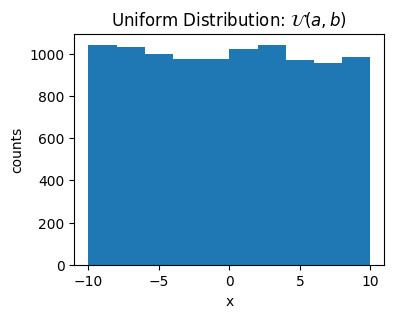

In [20]:
a = -10
b = 10
x = np.random.uniform(a, b, size=10000)
plot_histogram(x, title='Uniform Distribution: $\mathcal{U}(a,b)$')

**Aside:** As I just mentioned, the uniform distribution can be implemented just by shifting rand to fall between $a$ and $b$. Here's an implementation.

In [21]:
def uniform(a, b, size=1):
    x = np.random.rand(size)
    x = (b - a) * x + a
    return x

x = uniform(a, b, size=10); x

array([ 3.60199482,  7.34332596,  7.99264682, -3.21059824,  0.23076665,
        0.49892503, -8.14281033, -6.54534296, -5.00666745,  9.9848799 ])

**Gaussian Distribution:** $\mathcal{N}(\mu, \sigma^2)$

The Gaussian distribution (or normal distribution), denoted $\mathcal{N}(\mu, \sigma^2)$, is defined with two real parameters $\mu$ and $\sigma^2 \geq 0$ on the entire real line. Its density function is given by
$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\bigg(-\frac{(x - \mu)^2}{2\sigma^2}\bigg)}.$$

This function is the classic **bell curve**. Here's what it looks like in the *standard* case when $\mu=0, \sigma^2=1$. This distribution, written $\mathcal{N}(0,1)$, is called the standard Gaussian distribution.

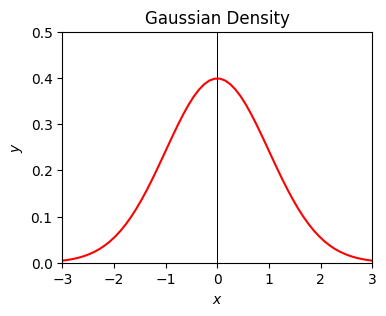

In [22]:
x = np.linspace(-5, 5, 100)
y = 1 / np.sqrt(2 * np.pi) * np.exp(-1/2 * x**2)
plot_function(x, y, xlim=(-3, 3), ylim=(0, 0.5), title='Gaussian Density', show_grid=False)

The Gaussian distribution is important for many reasons. One reason is that it's frequently a good model for measurement error, like the example I gave above. In fact, I generated the measurement data we saw using parameters $\mu=10.1, \sigma^2 = 0.4^2$.

The CDF of the Gaussian sometimes shows up as well in calculations. It doesn't have a closed form. The standard form CDF is so common we use a special symbol $\Phi(x)$ for it,

$$\Phi(x) = P(x) = \int_{-\infty}^x \frac{1}{\sqrt{2 \pi}} \exp{\bigg(-\frac{1}{2}x'^2\bigg)} dx'.$$

Here's what the CDF $\Phi(x)$ looks like. Even though we can't explicitly write down its functional form, we can use the `scipy.stats` function `norm.cdf` to get it for us. Notice the curve is monotonically increasing from 0 to 1 over the real line. It looks basically like a sigmoid function. This is more or less what CDFs look like in general, except they may be scaled differently.

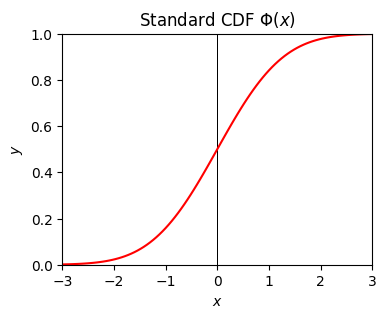

In [23]:
from scipy.stats import norm

x = np.linspace(-3, 3, num=100)
cdf = norm.cdf(x)

plot_function(x, cdf, xlim=(-3, 3), ylim=(0, 1), title='Standard CDF $\Phi(x)$', show_grid=False)

But what do the parameters $\mu$ and $\sigma^2$ actually do here? If you stare at the density function, you'll see it peaks when the exponent is zero, i.e. when $x=\mu$. Evidently, $\mu$ describes the center or peak of the distribution. It's called the **mean**. What about $\sigma^2$? Ignore the constant out front and just stare at the exponential again. Notice $\sigma^2$ is in the denominator of the exponent. As $\sigma^2$ gets bigger the exponent gets smaller, hence the curve gets flatter. And as $\sigma^2$ gets smaller the exponent gets larger, hence the curve gets sharper. It's called the **variance**. We'll talk more about the mean and variance soon. We can define them for any almost smooth distribution, continuous or discrete.

To sample from a Gaussian distribution we can use `np.random.normal(mu, sigma)`. Unfortunately this function takes the square root of the variance $\sqrt{\sigma^2}=\sigma$ as a parameter, not the variance $\sigma^2$ itself. Try not to get this mixed up. Note we can also sample from the *standard* Gaussian $\mathcal{N}(0,1)$ using the simpler function `np.random.randn`.

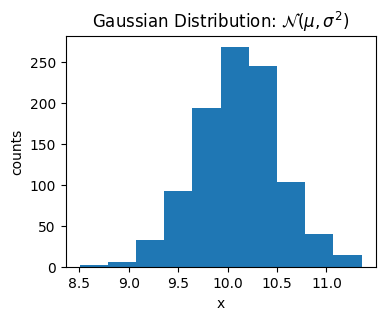

In [24]:
mu = 10.1
sigma = 0.4
x = np.random.normal(mu, sigma, size=1000)
plot_histogram(x, title='Gaussian Distribution: $\mathcal{N}(\mu, \sigma^2)$')

**Aside:** Just like every other distribution we've seen so far, we can again implement it from scratch just from using rand. While the function is easy to write down, why it works is a bit harder to describe. It uses what's called the [Box-Muller Transformation](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform). If we sample two variables $u_1,u_2$ from rand, i.e. $u_1, u_2 \sim \mathcal{U}(0,1)$, it turns out the random variable
$$z = \sqrt{-2 \log(u_1)} \cos(2 \pi u_2)$$
is distributed as $\mathcal{N}(0, 1)$. To get an arbitrary Gaussian we can just apply the shift-and-scale transformation $x = \sigma z + \mu$ to get a $\mathcal{N}(\mu, \sigma^2)$ value.

In [25]:
def normal(mu=0, sigma=1, size=1):
    u1 = np.random.rand(size)
    u2 = np.random.rand(size)
    z = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    x = z * sigma + mu
    return x

x = normal(0, 1, size=10); x

array([ 0.80738908, -1.86138724, -1.27188611, -0.47629969, -0.11477687,
        1.89107053,  0.86023914,  1.01702717, -1.01802481, -0.51311841])

**Laplace Distribution:** $\text{Laplace}(\mu, \sigma)$

The Laplace distribution, denoted $\text{Laplace}(\mu, \sigma)$, is very similar to the Gaussian distribution. It has a "shift" parameter $\mu$ and a "scale" parameter $\sigma$, and is defined on the whole real line by the density function
$$p(x) = \frac{1}{2\sigma} \exp\bigg(-\frac{|x-\mu|}{\sigma}\bigg).$$

Notice how similar this density looks to the Gaussian density. The shift parameter $\mu$ again acts to center the distribution, as well as its mean. The scale parameter $\sigma$ again acts as a sort of measure of the "spread" of the distribution, but its square isn't exactly the variance (it's half the variance). The main difference to notice is that we're looking at the *absolute* difference $|x-\mu|$ instead of the *mean square* difference $(x-\mu)^2$.

This difference makes the behavior of the curve look somewhat different at the peak and the tails of the distribution. At the peak $x=\mu$, instead of having a smooth bell shape, the Laplace density has a sharp peak. The tails on both sides also fall of somewhat slower than the Gaussian does, which makes it more likely it'll sample points further away from the center.

In python, we can sample from the Laplace distribution using `np.random.laplace(mu, sigma)`. Here's a plot of the density function along with the mirroring histogram. Notice that how sharply peaked things are around the center. Also note how fat the tails are on each end, and how much more likely it is that "larger" values get sampled compared to the Gaussian.

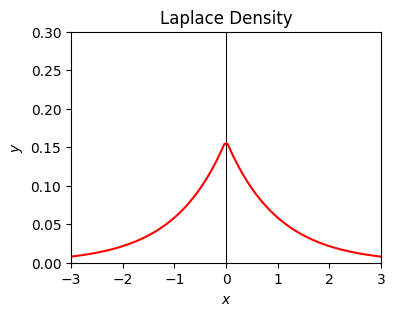

In [26]:
x = np.linspace(-3, 3, 100)
y = 1 / (2 * np.pi) * np.exp(-np.abs(x))
plot_function(x, y, xlim=(-3, 3), ylim=(0, 0.3), title='Laplace Density', show_grid=False)

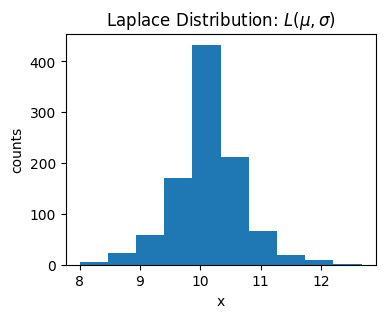

In [27]:
mu = 10.1
sigma = 0.4
x = np.random.laplace(mu, sigma, size=1000)
plot_histogram(x, title='Laplace Distribution: $L(\mu, \sigma)$')

**Aside:** We can implement a Laplace random number generator similar to how we did with the Gaussian generator, by sampling from rand and applying some kind of transformation to the output. In the case of Laplace, if $u$ is sampled from rand, the right transformation turns out to be
$$x = \mu - \sigma \text{ sign}\big(u-1/2\big) \log\big(1 - 2\big|u-1/2\big|\big), \qquad \text{where } u \sim U(0,1).$$
The sign function $\text{sign}(u-1/2)$ is defined to be $+1$ if $u > 1/2$, and $-1$ otherwise.
This transformation turns out to be the inverse CDF of the Laplace distribution, i.e. if $u=P(x)$, then $x=P^{-1}(u)$. Inverse CDFs, provided they can be solved for, are one popular method for sampling from arbitrary distributions like this.

In [28]:
def laplace(mu, sigma, size=1):
    u = np.random.rand(size)
    x = mu - sigma * np.sign(u - 0.5) * np.log(1 - 2 * np.abs(u - 0.5))
    return x

x = laplace(mu=0, sigma=1, size=10); x

array([-0.30036975,  1.02197783, -0.86437279, -0.01566763,  1.33127468,
       -0.25761936, -1.33002255,  0.29791958,  4.71408161, -0.11471316])

## Multivariate Distributions

### Definitions

Just as univariate function extend naturally to multivariate functions, the same is true of probabilities. We can naturally have probability functions of multiple random variables. For example, if $x,y$ are two random variables, then we can define their **joint distribution** via the probability (or density) function $p(x,y)$. For discrete variables, you can think of $p(x,y)$ as the number of times the combination $x_i,x_j$ both appear in an experiment, call it $n_{k,l}$. If we run $N$ total experiments, then

$$p(x_k,x_l) = p_{k,l} \approx \frac{n_{k,l}}{N},$$

where again the equality becomes exact as $N$ becomes infinitely large. The case for continuous distributions is defined similarly, except we consider counts inside $N$ tiny rectangular intervals 
$$a_k \leq x \leq a_{k+1}, \\ b_l \leq y \leq b_{l+1}.$$

If we have two random variables $x,y$, we can put them together to create a **random vector** $\mathbf{x}=(x,y)$, in which case we can also think of the joint distribution as a probability over vectors $p(\mathbf{x})$.

A very important notion to consider when it comes to joint distributions is the idea of statistical independence. Essentially, if two random variables $x$ and $y$ don't affect each other at all we can factor the joint distribution into a product of univariate distributions $p(x)$ and $p(y)$, each on its own variable acting alone. Inspired by this idea, we *define* two random variables $x$ and $y$ to be **independent** if

$$p(x,y) = p(x) \cdot p(y).$$

The univariate distributions $p(x)$ and $p(y)$ are usually called the **marginal distributions**. They're what you'd get if you summed out (or "marginalized out") the effect of the other variable.

Independence is so important that it's good to get an intuitive feel for when two random variables might be independent of each other. One classic example is flipping two coins in a row. Let $x=H,T$ be the value from flipping the first coin, and $y=H,T$ the value from flipping the second coin. Assuming both coins are fair, the probability of each individually being heads, i.e. $x=y=1$, is $p_x=p_y=\frac{1}{2}$. But what is the probability that *both* turn up heads? In that case the possible outcomes are $(x,y) = HH, HT, TH, TT$. By counting we can see that the probability of both being heads must then be $p_{x,y}=\frac{1}{4}$. Now, notice that this is just
$$p(x,y) = p(x) \cdot p(y) = \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4}.$$

You can verify this is true for all possible combinations of heads and tails. That is, $x$ and $y$ are independent.

All of these definitions and ideas extend readily to $n$ random variables as well. We can have joint distributions of the form $p(x_0,x_1,\cdots,x_{n-1})$, random vectors of the form $\mathbf{x} = (x_0,x_1,\cdots,x_{n-1})$, and so own. We say that $x_0,x_1,\cdots,x_{n-1}$ are independent if we can factor the joint distribution into a product of marginal distributions,
$$p(x_0,x_1,\cdots,x_{n-1}) = p(x_0)p(x_1) \cdots p(x_{n-1}).$$

The special case where all random variables $x_0,x_1,\cdots,x_{n-1}$ are *both* independent *and* come from the same distribution is special. We call these random variables **independent identically distributed** or **IID**. Not only do the joint distributions factor, but they all factor into probability functions with the same functional form. When we want to sample $x_0,x_1,\cdots,x_{n-1}$ IID from a marginal distribution $p(x)$, we'll sometimes use the shorthand
$$x_0,x_1,\cdots,x_{n-1} \overset{iid}{\sim} p(x),$$
or even more lazily just write $\mathbf{x} \overset{iid}{\sim} p(x)$.

### Application: Bernoulli Trials

An interesting application of the use of IID properties of distributions is the sum of IID Bernoulli random variables. Suppose $x_0,x_1,\cdots,x_{n-1} \overset{iid}{\sim} \text{Ber}(p_0)$. Let's consider a new (univariate) random variable gotten by summing up all these IID Bernoulli ones,

$$x = \sum_{j=0}^{n-1} x_j = x_0 + x_1 + \cdots x_{n-1}.$$

Let's try to think a bit about what this new random variable's properties are. First, notice since each $x_j=0,1$, the support of $x$ must be $x = 0, 1, \cdots, n$. Next, since the $x_j$ are all IID, the joint distribution $p(x_0,x_1,\cdots,x_{n-1})$ factors,

$$
\begin{align}
p(x_0,x_1,\cdots,x_{n-1}) &= p(x_0)p(x_1) \cdots p(x_{n-1}) \\
&= p_0^{x_0}(1-p_0)^{1-x_0} p_0^{x_1}(1-p_0)^{1-x_1} \cdots p_0^{x_{n-1}}(1-p_0)^{1-x_{n-1}} \\
&= p_0^{x_0+x_1+\cdots+x_{n-1}} (1-p_0)^{n-(x_0+x_1+\cdots+x_{n-1})} \\
&= p_0^{x} (1-p_0)^{n-x}.
\end{align}
$$

Notice the bottom right term is a function of $x$ alone. This suggests a way to define a probability function for our binomial random variable $x$. Perhaps we could just *define* $p(x)=p(x_0,x_1,\cdots,x_{n-1})$. This almost works, but not quite. The reason is that, while the *order* of terms in $p(x_0,x_1,\cdots,x_{n-1})$ matters, the order does *not* matter in the sum $x=x_0+x_1+\cdots+x_{n-1}$. We thus need to make the probability function order invariant by essentially considering the joint distributions for all possible orders of $x_0,x_1,\cdots,x_{n-1}$ such that $x=x_0+x_1+\cdots+x_{n-1}$.

Believe it or not this is easy though. We just need to multiply each $p_0^{x} (1-p_0)^{n-x}$ by the number of ways $x$ numbers can be sampled from a bin of $n$ numbers, assuming their order doesn't matter. If you're not familiar with this term I'll just tell you. It's called the binomial coefficient, usually denoted

$$\binom{n}{x} = \frac{n!}{x!(n-x)!},$$

where $j! = j(j-1)(j-2) \cdots 1$ for $j>0$ and $0! = 1$.

Using this coefficient, we can now define the probability function for this distribution as

$$
p(x) = \begin{cases}
\binom{n}{x} p_0^{x} (1-p_0)^{n-x}  & \text{for all } x=0,1,\cdots,n, \\
0 & \text{otherwise}.
\end{cases}
$$

This distribution is called the **binomial distribution**, sometimes denoted $\text{Bin}(n,p_0)$. In applications, the binomial distribution shows up anytime you're interested in how many binary-valued events might occur. The classic example is flipping $n$ coins and counting the number of heads. The number of heads can be modeled by a binomial distribution, assuming the number of coins $n$ is fixed.

One even more curious fact is that the binomial distribution *looks like* a Gaussian distribution when $n$ is large and $p_0$ isn't too close to 0 or 1. This is a consequence of the Central Limit Theorem, which I'll discuss in the next lesson. I'll show a quick example of this fact below by sampling from a binomial distribution using `np.random.binomial(n, p)` and then plotting its histogram. Notice how bell-shaped the curve looks.

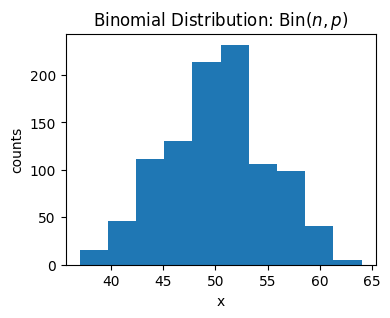

In [29]:
n = 100
p = 0.5
x = np.random.binomial(n, p, size=1000)
plot_histogram(x, title='Binomial Distribution: Bin$(n,p)$')

### Common Multivariate Distributions

All of the common distributions we've covered so far can be extended into the multivariate case. The most useful multivariate extensions for machine learning purposes are the multivariate uniform and multivariate Gaussian distributions.

**Multivariate Uniform Distribution:** $U(R)$

The multivariate uniform distribution defined on a support of region $R$, denoted $U(R)$, is given by the density function
$$
p(\mathbf{x}) = \begin{cases}
\frac{1}{V(R)} & \text{for all } \mathbf{x} \in R, \\
0 & \text{otherwise},
\end{cases}
$$
where $V(R)$ is the (hyper) volume or area of the region $R$ in $n$ dimensional space.

This is pretty much the same as the univariate uniform distribution $U(a,b)$, except that instead of being defined on an interval $a \leq x \leq b$, it's defined on a *region* of $n$ dimensional space $\mathbf{x} \in R$. That region could be rectangular, but it doesn't have to be. It could be circular, elliptical, disjointed, whatever.

In the special case that the region $R$ *is* rectangular, the multivariate uniform density factors into its marginals,

$$p(\mathbf{x}) = \frac{1}{b_0-a_0} \cdot \frac{1}{b_1-a_1} \cdots \frac{1}{b_{n-1}-a_{n-1}}, \quad \text{for all } \mathbf{x} \in [a_0,b_0] \times [a_1,b_1] \times [a_{n-1},b_{n-1}].$$

which then implies in this special case that $x_0,x_1,\cdots,x_{n-1}$ are all independent. If $R$ is a *square*, i.e. all $a_i=a$ and all $b_i=b$, then they're also IID.

**Multivariate Gaussian Distribution:** $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$

The multivariate Gaussian distribution, denoted by the symbol $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$, is defined on all of $n$ dimensional space $\mathbb{R}^n$ with density function

$$p(\mathbf{x}) = (2 \pi)^{-n/2} |\boldsymbol{\Sigma}|^{-1/2} \exp\bigg(-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^\top  \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\bigg),$$

where $\boldsymbol{\mu} \in \mathbb{R}^n$ is an n-dimensional real vector and $\boldsymbol{\Sigma} \in \mathbb{R}^{n \times n}$ is a positive square matrix. The vector $\boldsymbol{\mu}$ is the $n$ dimensional generalization of the mean, which is just a vector of means. The mean of variable $x_i$ is $\mu_i$ for all $i=0,\cdots,n-1$. The matrix $\boldsymbol{\Sigma}$ is called the **covariance matrix**. It's a symmetric, positive matrix that generalizes the notion of variance to $n$ dimensions. Why a matrix? Because each $x_i,x_j$ can have a notion of (co)variance with each other. More on this soon.

Notice the special symbol $|\boldsymbol{\Sigma}|$ in the constant term outside the exponential. It's not important to know what this is. Just consider it a function of $\boldsymbol{\Sigma}$ alone. If you must know, it's the *determinant* of the matrix. The only thing worth knowing is when $\boldsymbol{\Sigma}$ is diagonal, $|\boldsymbol{\Sigma}|$ is the product of the diagonal elements, which I'll use below.

Note the exponent term is really just a sum of a bunch of scalar terms when expanded out,
$$(\mathbf{x}-\boldsymbol{\mu})^\top  \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu}) = \sum_{i=0}^{n-1} \sum_{j=0}^{n-1} (x_i - \mu_i) \cdot \Sigma_{i,j}^{-1} \cdot (x_j - \mu_j),$$
hence the exponent is really just the sum of a bunch of quadratic terms, reminiscent of the univariate Gaussian.

In the special case when the covariance matrix $\boldsymbol{\Sigma}$ is diagonal, we say the random variables $x_0,x_1,\cdots,x_{n-1}$ are **uncorrelated**. Suppose
$$\boldsymbol{\Sigma} = \text{diag}(\sigma_0^2, \sigma_2^2, \cdots, \sigma_{n-1}^2).$$
You can pretty easily verify that its inverse is simply the reciprocals of the diagonal terms,
$$\boldsymbol{\Sigma}^{-1} = \text{diag}\bigg(\frac{1}{\sigma_0^2}, \frac{1}{\sigma_1^2}, \cdots, \frac{1}{\sigma_{n-1}^2}\bigg).$$
This makes the complicated looking exponent term reduce to a simple sum of squares. Using the fact $|\boldsymbol{\Sigma}|=\sigma_0\sigma_1\cdots\sigma_{n-1}$ as well, we get

$$
\begin{align}
p(\mathbf{x}) &= \frac{1}{\sqrt{2 \pi \sigma_0 \sigma_1 \cdots \sigma_{n-1}}} \exp\bigg(-\frac{1}{2} \sum_{i=0}^{n-1} \frac{(x_i - \mu_i)^2}{\sigma_i^2} \bigg) \\
&= \Bigg(\frac{1}{\sqrt{2 \pi \sigma_0^2}} \exp{\bigg(-\frac{(x_0 - \mu_0)^2}{2\sigma_0^2}\bigg)} \Bigg) \cdots \Bigg(\frac{1}{\sqrt{2 \pi \sigma_{n-1}^2}} \exp{\bigg(-\frac{(x_{n-1} - \mu_{n-1})^2}{2\sigma_{n-1}^2}\bigg)} \Bigg) \\
&= p(x_0) p(x_1) \cdots p(x_{n-1}).
\end{align}
$$

That is, the joint distribution $p(\mathbf{x})$ factors into a product of marginal Gaussian distributions $p(x_0) p(x_1) \cdots p(x_{n-1})$. This means that the variables $x_0,x_1,\cdots,x_{n-1}$ must be independent if they're uncorrelated. In the further special case where $\mu_i=\mu$ and $\sigma_i^2=\sigma^2$ for all $i$, they're also IID.

This distribution is so important to machine learning that it's worth taking some time to visualize it, as a surface in 3D space, as a set of contours, as 3D histogram, and as a heat map. Let's start with the first two. Suppose our random variable $\mathbf{x}=(x,y)$ is 2D. I'm going to plot the surface of the density function $p(x,y)$ as well as the contour plot side-by-side using a helper function `plot_multivariate_normal`. This function will take in the mean vector $\boldsymbol{\mu}$ and covariance matrix $\boldsymbol{\Sigma}$ and plot what the distribution looks like for that pair of parameters.

Let's define $\boldsymbol{\mu}=(\mu_x, \mu_y)$ and
$\boldsymbol{\Sigma} = 
\begin{pmatrix}
\sigma_x^2 & \sigma_{x,y} \\
\sigma_{x,y} & \sigma_y^2
\end{pmatrix}.$ A few things to notice:
- Changing $\boldsymbol{\mu}$ just changes where the density is centered. It doesn't change the shape.
- Changing $\sigma_x^2$ or $\sigma_y^2$ changes how much the density spreads in that direction. If they're equal the density will be perfectly circular. If one is greater than the other the density will become elliptical. In the limit one becomes much much greater than the other, the density will essentially just become a univariate Gaussian.
- Making $\sigma_{x,y}$ non-zero makes the density change its angle in the xy-plane. That's what introducing correlation essentially does geometrically. 
- Making $\sigma_{x,y}=0$ means that $x$ and $y$ become independent as I showed above. Geometrically, independence essentially rotates until the density is aligned along the axes themselves.

Feel free to play around with different choices of parameters and see how it affects the densities.

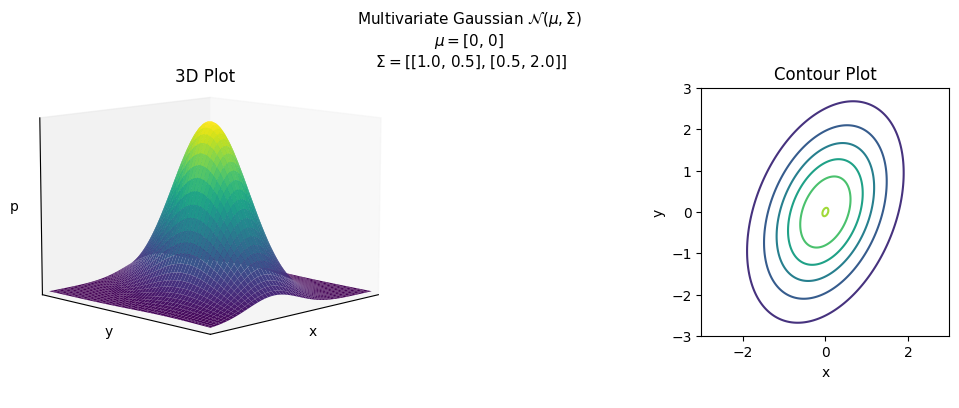

In [30]:
mu = np.array([0, 0])
Sigma = np.array([[1, 0.5], [0.5, 2]])
plot_multivariate_gaussian(mu, Sigma, elev=10, azim=45)

We can also of course plot the histograms. Suppose we sample a bunch of points $(x,y) \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$ a bunch of times and plot the histogram. In 3D it will look something like this. I'll plot the standard 2D Gaussian $\mathcal{N}(\mathbf{0}, \mathbf{I})$, which has mean zero and identity covariance. It's the multivariate generalization of the standard $\mathcal{N}(0,1)$ Gaussian. I'm using another helper function called `plot_3d_hist` here to hide a lot of ugly code.

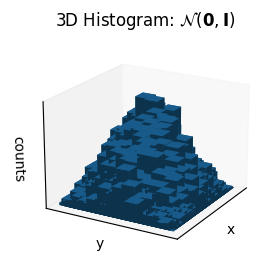

In [31]:
X = np.random.randn(10000, 2)
x, y = X[:, 0], X[:, 1]
plot_3d_hist(x, y, bins=30, xlim=(-2, 2), ylim=(-2, 2), elev=20, azim=30, 
             title='3D Histogram: $\mathcal{N}(\mathbf{0}, \mathbf{I})$')

Finally, we can view the same histogram contour-style using what's called a **heat map**. A heat map is a way of plotting one variable that depends on 2 others, e.g. $p(x,y)$ vs $x$ and $y$. In each grid of the plot the color indicates how "hot" the dependent variable is. The higher the counts in a given bin, the hotter the heat map will look at that bin. We can plot a histogram-style heatmap in matplotlib using `plt.hist2d`. Heat maps are very useful ways of visualizing data like this, usually more so than janky 3D plots like the one above.

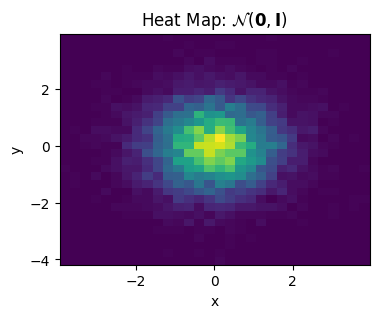

In [32]:
plt.hist2d(x, y, bins=30)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heat Map: $\mathcal{N}(\mathbf{0}, \mathbf{I})$')
plt.show()

## Moments of a Distribution

Probability distributions have special quantities that are worth keeping track of, called moments. The most important moments for practical purposes are the mean and variance, but there are higher-order moments as well like skewness and kurtosis that sometimes become important.

### Univariate Moments

Let's start with a boring term that I'll call the "zeroth moment". It's just a restatement of the fact that probabilities sum to one from before,

$$
1 = 
\begin{cases}
\sum_{k=0}^{K-1} p(x_k), & x \text{ is discrete}, \\ \\
\int_{-\infty}^\infty p(x) dx, & x \text{ is continuous}.
\end{cases}
$$

I state this again so you can compare it with the definitions of mean and variance below. Notice the only difference is that inside the sum or integral we're multiplying each $p(x)$ by some power of $x$. These powers of $x$ are called **moments** of the distribution.

Define the **mean** (or **expected value**) of a distribution $p(x)$, usually denoted by symbols like $\langle x \rangle$ or $\mathbb{E}(x)$ or $\mu$, by

$$
\langle x \rangle = \mathbb{E}(x) = 
\begin{cases}
\sum_{k=0}^{K-1} x_k p(x_k), & x \text{ is discrete}, \\ \\
\int_{-\infty}^\infty x p(x) dx, & x \text{ is continuous}.
\end{cases}
$$

The mean of a univariate distribution $p(x)$ is an estimate of the "center of mass" or the "balancing point" of the distribution. It will be a single number.

Suppose $\mu = \langle x \rangle$. Define the **variance** (or **mean square**) of a distribution $p(x)$, usually denoted $\text{Var}(x)$ or $\sigma^2$, by
the mean of the squared difference $(x-\mu)^2$, that is

$$
\text{Var}(x) = \big\langle (x-\mu)^2 \big\rangle = 
\begin{cases}
\sum_{k=0}^{K-1} (x_k-\mu)^2 p(x_k), & x \text{ is discrete}, \\ \\
\int_{-\infty}^\infty (x-\mu)^2 p(x) dx, & x \text{ is continuous}.
\end{cases}
$$

Similar to the mean, the variance of a univariate distribution will also be a single number indicating the "spread" of the distribution. More commonly, when talking about the "spread" of a distribution, we like to talk about the square root of the variance, called the **standard deviation** (or **root mean square**) and usually denoted $\sigma$,
$$\sigma = \sqrt{\text{Var}(x)}.$$

The standard deviation has the advantage that it's on the same scale of $x$, and has the same units.

I won't prove it, but this pattern is very general. We can talk about taking the mean of any function of a random variable just as well. Suppose $f(x)$ is some reasonably well-behaved function. Then we can talk about the mean of $f(x)$ by using

$$
\langle f(x) \rangle = \mathbb{E}f(x) = 
\begin{cases}
\sum_{k=0}^{K-1} f(x_k) p(x_k), & x \text{ is discrete}, \\ \\
\int_{-\infty}^\infty f(x) p(x) dx, & x \text{ is continuous}.
\end{cases}
$$

This trick is sometimes called the Law of the Unconscious Statistician.

It's worth noting that the mean operation is *linear*, which means two things,
- if $x$ and $y$ are two random variables, then $\langle x + y \rangle = \langle x \rangle + \langle y \rangle$,
- if $x$ is a random variable and $c$ is some constant, then $\langle cx \rangle = c\langle x \rangle$.

This fact follows immediately from the fact that the mean is just a sum (or integral), and sums are linear. This will always be true, not just for any two random variables, but any number of them. It *won't*, however, be true for the variance. That is, $$\text{Var}(x+y) \neq \text{Var}(x) + \text{Var}(y), \qquad \text{Var}(cx) = c^2\text{Var}(x).$$

### Multivariate Moments

Moments also extend to multivariate distributions, but it becomes more complicated. The *mean* for univariate distributions becomes the *mean vector* for multivariate distributions, while *variance* becomes the *covariance matrix*. Other moments can be even more complicated in the multivariate case by becoming higher-rank tensors. I'll briefly spell out the definition of mean and covariance below and stop there.

The **mean vector** of an $n$ dimensional multivariate distribution $p(\mathbf{x})$, denoted $\langle \mathbf{x} \rangle$ or $\mathbb{E}(\mathbf{x})$ or $\boldsymbol{\mu}$, is defined by

$$
\langle \mathbf{x} \rangle = \mathbb{E}(\mathbf{x}) = 
\begin{cases}
\sum_{k=0}^{K-1} \mathbf{x}_k p(\mathbf{x}_k), & \mathbf{x} \text{ is discrete}, \\ \\
\int_{\mathbb{R}^n} \mathbf{x} p(\mathbf{x}) dA_{n-1}, & \mathbf{x} \text{ is continuous}.
\end{cases}
$$

If you look carefully, you'll see the mean vector is just the vector whose components are the ordinary means, $\mu_i = \langle x_i \rangle$. Just as in the univariate case, the mean vector again represents the "center of mass" of the distribution, except now in $n$ dimensional space.

The **covariance matrix** of an $n$ dimensional multivariate distribution $p(\mathbf{x})$, denoted either $\text{Cov}(\mathbf{x})$ or $\boldsymbol{\Sigma}$, is defined as the mean square of the outer product of the difference $\mathbf{x} - \boldsymbol{\mu}$, i.e.
$$\boldsymbol{\Sigma} = \text{Cov}(\mathbf{x}) = \big\langle (\mathbf{x}-\boldsymbol{\mu}) (\mathbf{x}-\boldsymbol{\mu})^\top \big\rangle \qquad \Rightarrow \qquad
\sigma_{i,j} = \langle (x_i-\mu_i)(x_j-\mu_j) \rangle.$$

This gives a symmetric, positive $(n,n)$ matrix whose elements $\sigma_{i,j}$ represent how much any two variables "depend on each other". The diagonal elements $\sigma_{i,i}$ represent the variances of each $x_i$, while the off-diagonal elements $\sigma_{i,j}$, $i \neq j$ represent the correlation of $x_i$ with $x_j$. The higher $\sigma_{i,j}$, the higher the two variables are said to correlate. If $\sigma_{i,j}=0$ the two variables are said to be uncorrelated.

### Example: Bernoulli Distribution

Just so you can see how this process is done, I'll work one simple example, the Bernoulli distribution. This one should be easy since it only takes on two values $x=0,1$. The other ones, not so much. 

Recall for Bernoulli we have the probability function

$$
p(x) = 
\begin{cases}
p_0 & x = 1, \\
(1-p_0) & x = 0.
\end{cases}
$$

For the mean, we thus have

$$
\begin{align}
\langle x \rangle &= \sum_{x=0}^{1} x p(x) \\
&= (0 \cdot (1-p_0)) + (1 \cdot p_0) \\
&= p_0.
\end{align}
$$

That is, $\mu = \langle x \rangle = p_0$. The mean of Bernoulli is just the probability that $x=1$.

For the variance, we have

$$
\begin{align}
\text{Var}(x) &= \langle (x-\mu)^2 \rangle \\
&= \sum_{x=0}^{1} (x - \mu)^2 p(x) \\
&= ((0-p_0)^2 \cdot (1-p_0)) + ((1-p_0)^2 \cdot p_0) \\
&= p_0^2 \cdot (1-p_0) + (1-p_0)^2 \cdot p_0 \\
&= p_0 (1 - p_0).
\end{align}
$$

Thus, the variance of Bernoulli is $\text{Var}(x) = p_0(1-p_0)$, i.e. the probability $x=1$ times the probability $x=0$. Taking the square root then gives the standard deviation, $\sigma = \sqrt{p_0(1-p_0)}$.

### List of Means and Variances

Rather than put you through the tedium of anymore boring and messy calculations, I'll just list the mean and variance of several common distributions below for reference. Notice they won't be a function of the random variable, but they *will* be a function of the distribution's parameters.

<table>
  <tr>
    <th style="text-align: left;">Distribution</th>
    <th style="text-align: left;">Support</th>
    <th>Mean</th>
    <th>Variance</th>
  </tr>
  <tr>
    <td style="width: 200px; height: 40px; text-align: left;">Discrete Uniform $\text{DU}(a,b)$</td>
    <td style="width: 150px; height: 40px; text-align: left;">$x=a,a+1,\cdots,b-1$</td>
    <td style="width: 150px; height: 40px;">$\frac{1}{2}(a+b-1)$</td>
    <td style="width: 150px; height: 40px;">$\frac{1}{12}((b-a)^2-1)$</td>
  </tr>
  <tr>
    <td style="width: 200px; height: 40px; text-align: left;">Bernoulli $\text{Ber}(p_0)$</td>
    <td style="width: 150px; height: 40px; text-align: left;">$x=0,1$</td>
    <td style="width: 150px; height: 40px;">$p_0$</td>
    <td style="width: 150px; height: 40px;">$p_0 \cdot (1-p_0)$</td>
  </tr>
  <tr>
    <td style="width: 200px; height: 40px; text-align: left;">Categorical $\text{Cat}(p_0,\cdots,p_{K-1})$</td>
    <td style="width: 150px; height: 40px; text-align: left;">$x=0,1,\cdots,K-1$</td>
    <td style="width: 150px; height: 40px;">$p_k$</td>
    <td style="width: 150px; height: 40px;">$p_k \cdot (1 - p_k)$</td>
  </tr>
  <tr>
    <td style="width: 200px; height: 40px; text-align: left;">Uniform $U(a,b)$</td>
    <td style="width: 150px; height: 40px; text-align: left;">$a \leq x \leq b$</td>
    <td style="width: 150px; height: 40px;">$\frac{1}{2}(a+b)$</td>
    <td style="width: 150px; height: 40px;">$\frac{1}{12}(b-a)^2$</td>
  </tr>
  <tr>
    <td style="width: 200px; height: 40px; text-align: left;">Gaussian $\mathcal{N}(\mu,\sigma^2)$</td>
    <td style="width: 150px; height: 40px; text-align: left;">$-\infty < x < \infty$</td>
    <td style="width: 150px; height: 40px;">$\mu$</td>
    <td style="width: 150px; height: 40px;">$\sigma^2$</td>
  </tr>
  <tr>
    <td style="width: 200px; height: 40px; text-align: left;">Laplace $L(\mu,\sigma)$</td>
    <td style="width: 150px; height: 40px; text-align: left;">$-\infty < x < \infty$</td>
    <td style="width: 150px; height: 40px;">$\mu$</td>
    <td style="width: 150px; height: 40px;">$2\sigma$</td>
  </tr>
  <tr>
    <td style="width: 200px; height: 40px; text-align: left;">Multivariate Gaussian $\mathcal{N}(\boldsymbol{\mu},\boldsymbol{\Sigma})$</td>
    <td style="width: 150px; height: 40px; text-align: left;">$\mathbf{x} \in \mathbb{R}^n$</td>
    <td style="width: 150px; height: 40px;">$\boldsymbol{\mu}$</td>
    <td style="width: 150px; height: 40px;">$\boldsymbol{\Sigma}$</td>
  </tr>
</table>

## Conditional Distributions

- Define $y|x$ and $p(y|x)$
- If $x$ takes on some value, what is the chance of any given $y$
- Define conditional independence
- State law of total probabilities (conditioning over all possible values of $x$)
- Derive Bayes Rule
- Bayesian updating

In [ ]:
# p(x, y) = p(y|x) p(x)
# p(x) = p(x|y=0) p(y=0) + p(x|y=1) p(y=1)

## Implementing Rand [Optional]

When I defined a random number generator at the beginning of this lesson, I used the phrase "(pseudo) random". What did I mean by that? It turns out that random number generators are not *actually* random. They're completely deterministic. They only *act* random. Random number generators are just regular python functions whose outputs only *appear* to be random compared to each other. Numbers generated this way are called **pseudo-random**.

How do we build such a function? The trick is to define a function that generates outputs in a sequence that look like they have no discernible relationship to each other. To illustrate how this works I'm going to build the rand function from scratch! To do so I'll define a function $f(x)$ that can generate $n$ random numbers $x_1,x_2,\cdots,x_n$. Pick some initial value $x_0$, called a **seed**. The function should then generate the $n$ values recursively as follows,

$$
x_0 = \text{seed} \\
x_1 = f(x_0) \\
x_2 = f(x_1) \\
\cdots \\
x_n = f(x_{n-1}).
$$

We of course need to specify what the function $f(x)$ is. We want a function that can generate a sequence of numbers  that look like they were uniformly sampled from the interval $0 \leq x \leq 1$. One simple, though non-intuitive type of function that can do this is called a linear congruence generator (LCG), which is a "hashing" function of the form
$$f(x) = (ax + c) \text{ mod } m,$$
where $a,c,m$ are suitably large integer constants that need to be specified. 

I won't go into too much more detail on why this function is used or the trade-offs of the different choices for $a,c,m$ since this is a machine learning book. I'll just state that one standard [choice](https://en.wikipedia.org/wiki/Linear_congruential_generator) for the parameters is
$$a=1664525, \\ c=1013904223, \\ m=2^{32}.$$

Using these we can build a rand function by generating values from $f(x)$, and then dividing them by $m$ to get them into the range $0 \leq x \leq 1$. Below is a rand function implementation with a numpy-like API that uses the above LCG implementation. I'll also use it to sample 10,000 points and plot a histogram to demonstrate that it does as expected.

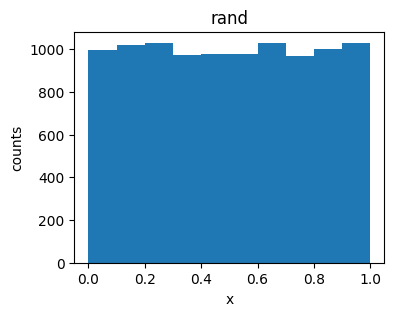

In [33]:
def rand(size=1, seed=0, a=1664525, c=1013904223, m=2**32):
    f = lambda x0: (a * x0 + c) % m
    x0 = seed
    x = []
    for i in range(size):
        x0 = f(x0)
        x.append(x0 / m)
    return np.array(x)

n = 10000
x = rand(size=n)
plot_histogram(x, title='rand')